## Handwritten digit recognition using mnist dataset

### Importing the libraries

In [1]:
import keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

### Loading and exploring the dataset

In [2]:
#loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('Shape of training set X = {} , Y = {}'.format(x_train.shape, y_train.shape))
print('Shape of testing set  X = {} , Y = {}'.format(x_test.shape, y_test.shape))

Shape of training set X = (60000, 28, 28) , Y = (60000,)
Shape of testing set  X = (10000, 28, 28) , Y = (10000,)


In [5]:
#reshaping the dataset
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
print('Shape of training set X = {} , Y = {}'.format(x_train.shape, y_train.shape))
print('Shape of testing set  X = {} , Y = {}'.format(x_test.shape, y_test.shape))

Shape of training set X = (60000, 28, 28, 1) , Y = (60000, 10)
Shape of testing set  X = (10000, 28, 28, 1) , Y = (10000, 10)


### Normalizing the data

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

### Model Architecture

In [8]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.5))
#units = 10 as we have 10 digits 0-9
model.add(Dense(units = 10, activation = 'softmax'))

In [9]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])
fit = model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test),batch_size = 128, epochs = 10, shuffle = True)
model.evaluate(x = x_test, y = y_test)

Epoch 1/10
469/469 [==============================] - 37s 71ms/step - loss: 0.3998 - accuracy: 0.8756 - val_loss: 0.0660 - val_accuracy: 0.9806
Epoch 2/10
469/469 [==============================] - 32s 69ms/step - loss: 0.1144 - accuracy: 0.9694 - val_loss: 0.0451 - val_accuracy: 0.9852
Epoch 3/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0800 - accuracy: 0.9793 - val_loss: 0.0355 - val_accuracy: 0.9893
Epoch 4/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0623 - accuracy: 0.9836 - val_loss: 0.0321 - val_accuracy: 0.9909
Epoch 5/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0532 - accuracy: 0.9861 - val_loss: 0.0370 - val_accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0473 - accuracy: 0.9880 - val_loss: 0.0293 - val_accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0406 - accuracy: 0.9898 - val_loss: 0.0251 - val_accuracy:

[0.02926185354590416, 0.9930999875068665]

1/1 [==============================] - 0s 21ms/step
Predicted number: 3


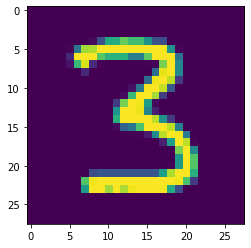

In [14]:
my_image = "num3.png"  # feel free to change the image

# preprocesing the image to fit the algorithm.
image = np.array(Image.open(my_image).resize((28,28)))
image = image[:,:,0]
plt.imshow(image);
image = image / 255.
image = image.reshape((1,28,28,1))
my_predicted_image = model.predict(image)
print('Predicted number: {}'.format(np.argmax(my_predicted_image)))